# Демонстрация. Расчет p-value через Bootstrap-тест.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("paper", font_scale=2)

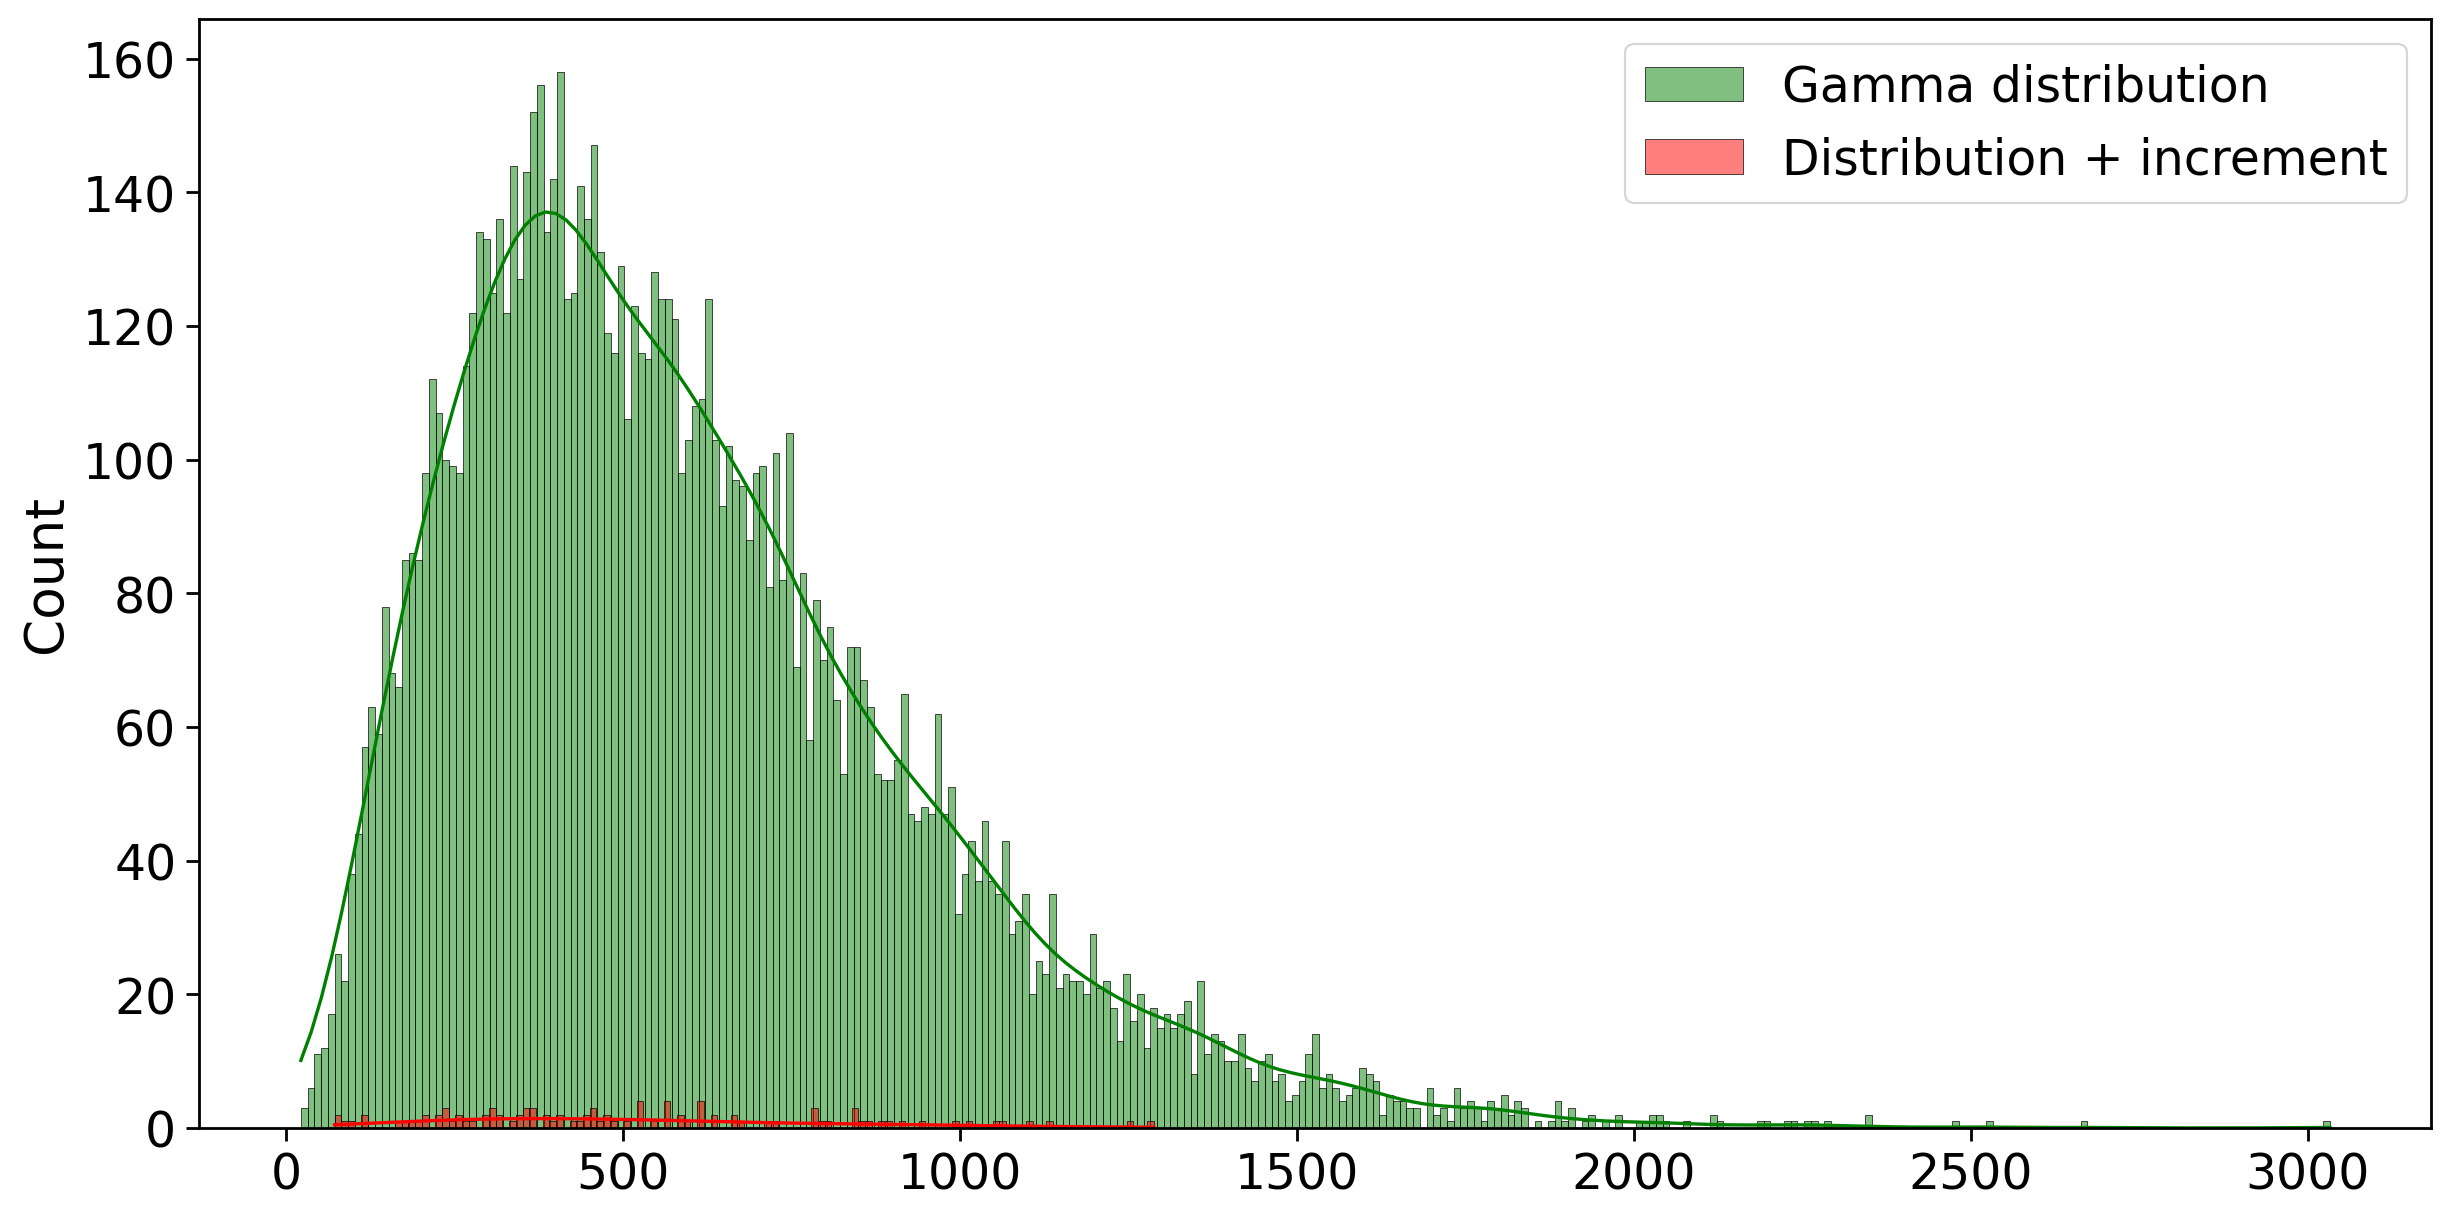

In [3]:
# Генерируем 2 гамма распределения.
# Берем для них одинаковые параметры, но ко второму добавляем инкремент который можно задать переменной increment
np.random.seed(111)

increment = 20
gamma_distr_1 = np.random.gamma(3, 1, 10000) * 200
gamma_distr_2 = np.random.gamma(3, 1, 100) * 200 + increment

# Отображаем гистограмму распределений и кривые плотности вероятности
fig, ax = plt.subplots(figsize=(14.4, 7.2), dpi=200)

sns.histplot(gamma_distr_1, kde=True, binwidth=10, ax=ax, color='green', alpha=0.5, label='Gamma distribution')
sns.histplot(gamma_distr_2, kde=True, binwidth=10, ax=ax, color='red', alpha=0.5, label='Distribution + increment')

ax.legend();

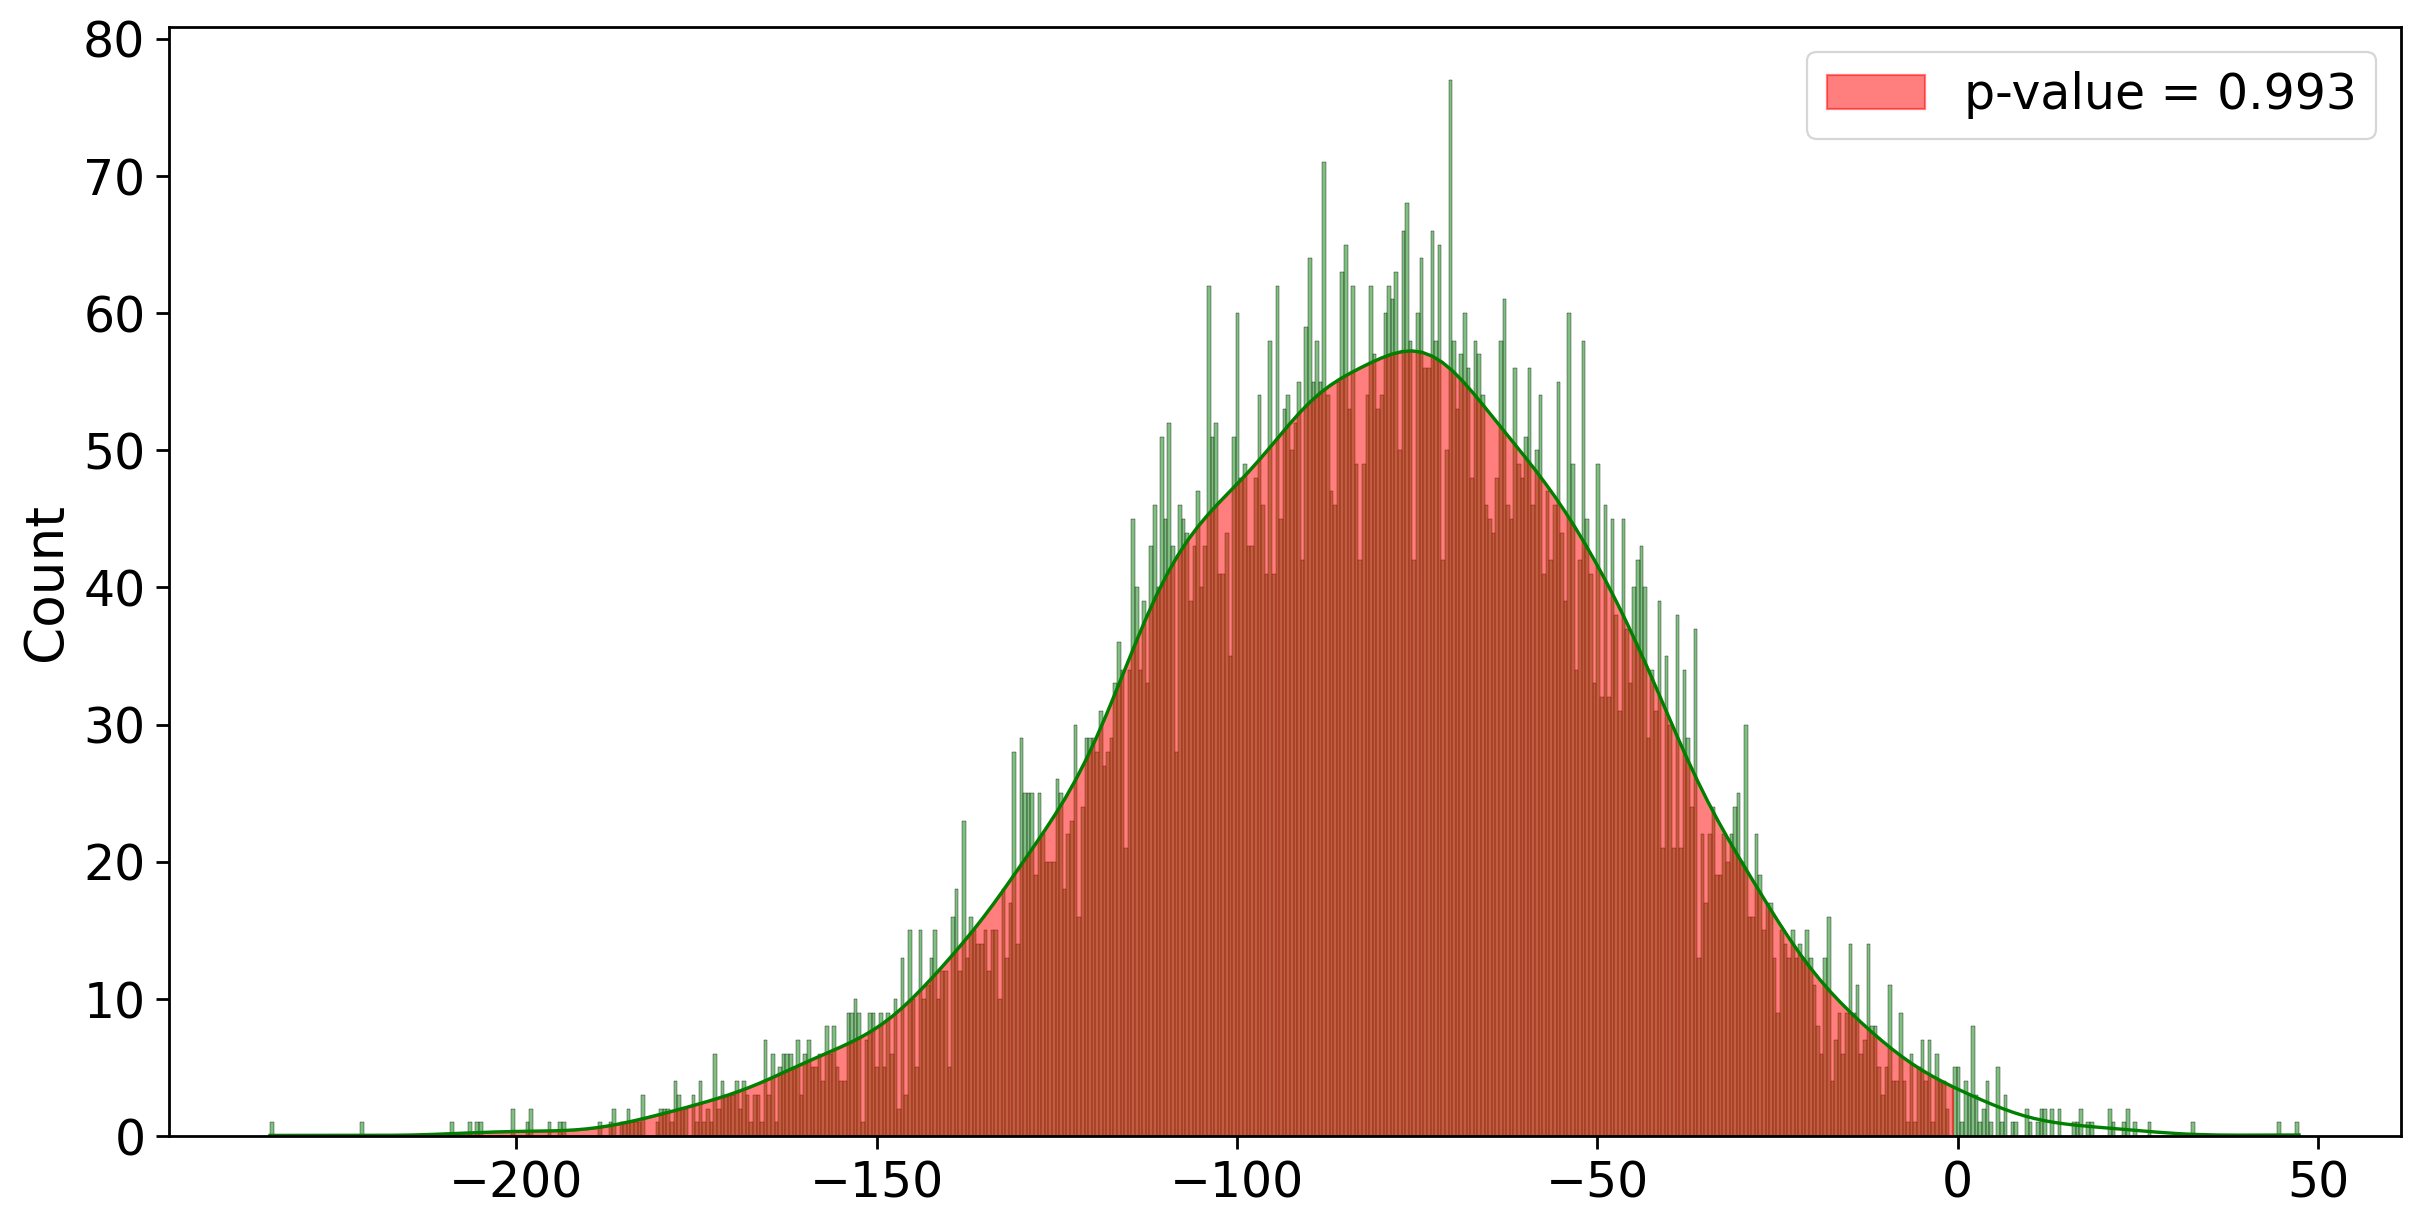

In [4]:
# С помощью bootstrap берем подвыборки с возвратом из распределений.
# Для полученных подвыборок считаем среднее и затем разность этих средних запоминаем
diff_list = []
for _ in range(10000):
    sample1 = np.random.choice(gamma_distr_1, 100)
    sample2 = np.random.choice(gamma_distr_2, 10000)
    diff_list.append(np.mean(sample2) - np.mean(sample1))

# Отображаем гистограмму полученных разностей
fig, ax = plt.subplots(figsize=(14.4, 7.2), dpi=200)

sns.histplot(diff_list, binwidth=0.5, kde=True, ax=ax, color='green', alpha=0.5)

# Рассчитываем p-value как количество полученных разностей меньше 0 к общему количеству полученных разностей
p_value = len([i for i in diff_list if i <= 0]) / len(diff_list)

# Закрашиваем область слева от 0
kde_xdata, kde_ydata= ax.lines[0].get_data()
ax.fill_between(kde_xdata, kde_ydata, where=(kde_xdata<0), color='red', alpha=0.5, label=f'p-value = {p_value:.3f}')

ax.legend();